# Project Part 1

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://www.kaggle.com/itzelbailon/projectpart1/)

## a) Introductory proposal

   I will use a Natural Language Processing model for language detection/prediction using a Kaggle data base (https://www.kaggle.com/datasets/zarajamshaid/language-identification-datasst). This database contains 2 columns, one for text details(sample text) with 22000 unique values, and one for Language with 22 different languages:
   
 1. English
 2. Arabic
 3. French
 4. Hindi
 5. Urdu
 6. Portuguese
 7. Persian
 8. Pushto
 9. Spanish
 10. Korean
 11. Tamil
 12. Turkish
 13. Estonian
 14. Russian
 15. Romanian
 16. Chinese
 17. Swedish
 18. Latin
 19. Indonesian
 20. Dutch
 21. Japanese
 22. Thai
   
   Predicting a language is a multiclass classification problem, as the model will divide the observations into 22 categories. Support Vector Machines model and Multinomial Naive Bayes will be used to predict the language.



## b) Exploratory Data Analysis

In [1]:
# import all of the python modules/packages you'll need here
import pandas as pd# data processsing, CSV file I/O (e.g. pd.read_csv)
import numpy as np# linear algebra
import re
from scipy.stats import norm
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter
import warnings
warnings.simplefilter("ignore")
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


# import the dataset 
data_URL = "../input/language-identification-datasst/dataset.csv"
df = pd.read_csv(data_URL)#dataset with 22 languages
print(f"df.shape: {df.shape}")
#A change in the default display width for a pandas dataframe column
pd.set_option("display.max_colwidth", 240)
df

/kaggle/input/language-identification-datasst/dataset.csv
df.shape: (22000, 2)


,Text,language
0,klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn...,Estonian
1,sebes joseph pereira thomas på eng the jesuits and the sino-russian treaty of nerchinsk the diary of thomas pereira bibliotheca instituti historici s i -- rome libris,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เริ่มตั้งแต่ถนนสนามไชยถึงแม่น้ำเจ้าพระยาที่ถนนตก กรุงเทพมหานคร เป็นถนนรุ่นแรกที่ใช้เทคนิคการสร้างแบบตะวันตก ปัจจุบันผ่านพื้นที่เขตพระนคร เขตป้อมปราบศัตรูพ่าย เขตสัมพันธวงศ์ เขตบางรัก เขตสาทร ...,Thai
3,"விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திரிகை-விசாகப்பட்டின ஆசிரியர் சம்பத்துடன் இணைந்து விரிவுபடுத்தினார் ஆண்டுகள் தொடர்ந்து செயலராக இருந்து தமிழ்மன்றத்தை நடத்திச் சென்றார் கோவை செம்மொழி மாநாட்டில் ""தமிழ்ச்சங்கங்களும் தமிழும்"" என...",Tamil
4,de spons behoort tot het geslacht haliclona en behoort tot de familie chalinidae de wetenschappelijke naam van de soort werd voor het eerst geldig gepubliceerd in door kudelin,Dutch
...,...,...
21995,hors du terrain les années et sont des années de crise pour le championnat le titre de champion de france attise les convoitises et entraîne des dérives violence sur les terrains et accusations d’amateurisme marron rythment de plus e...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเดียทรงได้พบอดียรองกงสุลอังกฤษ นายเฮนรี่ อลาบาสเตอร์ ได้กราบบังคมทูลถวายคำแนะนำในสำรวจและทำแผนที่ จึงได้ทรงพระกรุณาโปรดเกล้าฯ ให้ตั้งกองทำแผนที่ทดลอง ใน พศ,Thai
21997,con motivo de la celebración del septuagésimoquinto ° aniversario de la fundación del departamento en guillermo ceballos espinosa presentó a la gobernación de caldas por encargo de su titular dilia estrada de gómez el himno que fue ado...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由美國的獨立廠牌bip·record發行，以外國輸入盤的形式在日本發售，旋即被抢购一空。其後於月日發行以倉木麻衣名義發行的首張日文單曲《love day after tomorrow》，正式於日本出道。這張單曲初動銷量只得約萬張，可是其後每週銷量一直上升，並於年月正式突破百萬銷量，合计万张。成為年最耀眼的新人歌手。,Chinese


In [2]:
#How many rows of data there is in this dataset
len(df)

22000

Knowing how many rows of data are in this dataset will give us an idea of how many repeated samples of text is in this dataset.

### Preprocessing

It's important to clean the data and take some preventive steps before doing the analysis.

First, let's convert the 'Text' column to string format in case there is some data not in string format.

In [3]:
df['Text']= df['Text'].astype(str)

Then, let's delete any row that might have missing text.

In [4]:
df=df[~df['Text'].isnull()]
len(df)

22000

Now let's remove special characters and punctuation that are not helpful for analysis. Let's convert all text to lower case to avoid same words to be consider as different because of an uppercase. And finally let's remove numbers, since they are not used for translation purposes.

In [5]:
#Deleting the Special Characters and Punctuation

#This removes any characters that are not letters or numbers
df['preprocessed_text'] = df['Text'].str.replace('\W',' ') 


#Convert to lower case

df['preprocessed_text'] = df['preprocessed_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Remove numbers
df['preprocessed_text'] = df['preprocessed_text'].str.replace('\d+','')

df

,Text,language,preprocessed_text
0,klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn...,Estonian,klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn ...
1,sebes joseph pereira thomas på eng the jesuits and the sino-russian treaty of nerchinsk the diary of thomas pereira bibliotheca instituti historici s i -- rome libris,Swedish,sebes joseph pereira thomas på eng the jesuits and the sino russian treaty of nerchinsk the diary of thomas pereira bibliotheca instituti historici s i rome libris
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เริ่มตั้งแต่ถนนสนามไชยถึงแม่น้ำเจ้าพระยาที่ถนนตก กรุงเทพมหานคร เป็นถนนรุ่นแรกที่ใช้เทคนิคการสร้างแบบตะวันตก ปัจจุบันผ่านพื้นที่เขตพระนคร เขตป้อมปราบศัตรูพ่าย เขตสัมพันธวงศ์ เขตบางรัก เขตสาทร ...,Thai,ถนนเจร ญกร ง อ กษรโรม น thanon charoen krung เร มต งแต ถนนสนามไชยถ งแม น ำเจ าพระยาท ถนนตก กร งเทพมหานคร เป นถนนร นแรกท ใช เทคน คการสร างแบบตะว นตก ป จจ บ นผ านพ นท เขตพระนคร เขตป อมปราบศ ตร พ าย เขตส มพ นธวงศ เขตบางร ก เขตสาทร และเขตบา...
3,"விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திரிகை-விசாகப்பட்டின ஆசிரியர் சம்பத்துடன் இணைந்து விரிவுபடுத்தினார் ஆண்டுகள் தொடர்ந்து செயலராக இருந்து தமிழ்மன்றத்தை நடத்திச் சென்றார் கோவை செம்மொழி மாநாட்டில் ""தமிழ்ச்சங்கங்களும் தமிழும்"" என...",Tamil,வ ச கப பட ட னம தம ழ ச சங கத த இந த ப பத த ர க வ ச கப பட ட ன ஆச ர யர சம பத த டன இண ந த வ ர வ பட த த ன ர ஆண ட கள த டர ந த ச யலர க இர ந த தம ழ மன றத த நடத த ச ச ன ற ர க வ ச ம ம ழ ம ந ட ட ல தம ழ ச சங கங கள ம தம ழ ம என ம தல ப ப ல ப ற ம ந லங ...
4,de spons behoort tot het geslacht haliclona en behoort tot de familie chalinidae de wetenschappelijke naam van de soort werd voor het eerst geldig gepubliceerd in door kudelin,Dutch,de spons behoort tot het geslacht haliclona en behoort tot de familie chalinidae de wetenschappelijke naam van de soort werd voor het eerst geldig gepubliceerd in door kudelin
...,...,...,...
21995,hors du terrain les années et sont des années de crise pour le championnat le titre de champion de france attise les convoitises et entraîne des dérives violence sur les terrains et accusations d’amateurisme marron rythment de plus e...,French,hors du terrain les années et sont des années de crise pour le championnat le titre de champion de france attise les convoitises et entraîne des dérives violence sur les terrains et accusations d amateurisme marron rythment de plus en p...
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเดียทรงได้พบอดียรองกงสุลอังกฤษ นายเฮนรี่ อลาบาสเตอร์ ได้กราบบังคมทูลถวายคำแนะนำในสำรวจและทำแผนที่ จึงได้ทรงพระกรุณาโปรดเกล้าฯ ให้ตั้งกองทำแผนที่ทดลอง ใน พศ,Thai,ใน พศ หล กจากท เสด จประพาสแหลมมลาย ชวา อ นเด ยทรงได พบอด ยรองกงส ลอ งกฤษ นายเฮนร อลาบาสเตอร ได กราบบ งคมท ลถวายคำแนะนำในสำรวจและทำแผนท จ งได ทรงพระกร ณาโปรดเกล าฯ ให ต งกองทำแผนท ทดลอง ใน พศ
21997,con motivo de la celebración del septuagésimoquinto ° aniversario de la fundación del departamento en guillermo ceballos espinosa presentó a la gobernación de caldas por encargo de su titular dilia estrada de gómez el himno que fue ado...,Spanish,con motivo de la celebración del septuagésimoquinto aniversario de la fundación del departamento en guillermo ceballos espinosa presentó a la gobernación de caldas por encargo de su titular dilia estrada de gómez el himno que fue adopta...
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由美國的獨立廠牌bip·record發行，以外國輸入盤的形式在日本發售，旋即被抢购一空。其後於月日發行以倉木麻衣名義發行的首張日文單曲《love day after tomorrow》，正式於日本出道。這張單曲初動銷量只得約萬張，可是其後每週銷量一直上升，並於年月正式突破百萬銷量，合计万张。成為年最耀眼的新人歌手。,Chinese,年月 當時還只有歲的她在美國出道 以mai k名義推出首張英文 baby i like 由美國的獨立廠牌bip record發行 以外國輸入盤的形式在日本發售 旋即被抢购一空 其後於月日發行以倉木麻衣名義發行的首張日文單曲 love day after tomorrow 正式於日本出道 這張單曲初動銷量只得約萬張 可是其後每週銷量一直上升 並於年月正式突破百

Remove duplicate text.

In [6]:
#Delete the Punctuation

#df['preprocessed_text'] = df['preprocessed_text'].str.replace('[^\w\s]', '')
#df['preprocessed_text'].head()


df.drop_duplicates(subset=['Text'],keep='first',inplace=True)
print(df.shape)
df.head(10)

(21859, 3)


,Text,language,preprocessed_text
0,klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn...,Estonian,klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn ...
1,sebes joseph pereira thomas på eng the jesuits and the sino-russian treaty of nerchinsk the diary of thomas pereira bibliotheca instituti historici s i -- rome libris,Swedish,sebes joseph pereira thomas på eng the jesuits and the sino russian treaty of nerchinsk the diary of thomas pereira bibliotheca instituti historici s i rome libris
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เริ่มตั้งแต่ถนนสนามไชยถึงแม่น้ำเจ้าพระยาที่ถนนตก กรุงเทพมหานคร เป็นถนนรุ่นแรกที่ใช้เทคนิคการสร้างแบบตะวันตก ปัจจุบันผ่านพื้นที่เขตพระนคร เขตป้อมปราบศัตรูพ่าย เขตสัมพันธวงศ์ เขตบางรัก เขตสาทร ...,Thai,ถนนเจร ญกร ง อ กษรโรม น thanon charoen krung เร มต งแต ถนนสนามไชยถ งแม น ำเจ าพระยาท ถนนตก กร งเทพมหานคร เป นถนนร นแรกท ใช เทคน คการสร างแบบตะว นตก ป จจ บ นผ านพ นท เขตพระนคร เขตป อมปราบศ ตร พ าย เขตส มพ นธวงศ เขตบางร ก เขตสาทร และเขตบา...
3,"விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திரிகை-விசாகப்பட்டின ஆசிரியர் சம்பத்துடன் இணைந்து விரிவுபடுத்தினார் ஆண்டுகள் தொடர்ந்து செயலராக இருந்து தமிழ்மன்றத்தை நடத்திச் சென்றார் கோவை செம்மொழி மாநாட்டில் ""தமிழ்ச்சங்கங்களும் தமிழும்"" என...",Tamil,வ ச கப பட ட னம தம ழ ச சங கத த இந த ப பத த ர க வ ச கப பட ட ன ஆச ர யர சம பத த டன இண ந த வ ர வ பட த த ன ர ஆண ட கள த டர ந த ச யலர க இர ந த தம ழ மன றத த நடத த ச ச ன ற ர க வ ச ம ம ழ ம ந ட ட ல தம ழ ச சங கங கள ம தம ழ ம என ம தல ப ப ல ப ற ம ந லங ...
4,de spons behoort tot het geslacht haliclona en behoort tot de familie chalinidae de wetenschappelijke naam van de soort werd voor het eerst geldig gepubliceerd in door kudelin,Dutch,de spons behoort tot het geslacht haliclona en behoort tot de familie chalinidae de wetenschappelijke naam van de soort werd voor het eerst geldig gepubliceerd in door kudelin
5,エノが行きがかりでバスに乗ってしまい、気分が悪くなった際に助けるが、今すぐバスを降りたいと運転手に頼む際、本当のことを言ってしまうと彼女が恥ずかしい思いをすると察して「僕ウンコしたいんです」と言ってバスを降りた。エノは内心「私もしたいみたいじゃないの」と思うも、別れ際にエノの髪を「ふわふわのお菓子みたい」と言い、この台詞に憧れていたエノに強い衝撃を与えた。この話を聞いたリコは、以後彼のことを『ウンコ王子』または『ウンコ』というあだ名で呼ぶようになったが、エノは普通に「...,Japanese,エノが行きがかりでバスに乗ってしまい 気分が悪くなった際に助けるが 今すぐバスを降りたいと運転手に頼む際 本当のことを言ってしまうと彼女が恥ずかしい思いをすると察して 僕ウンコしたいんです と言ってバスを降りた エノは内心 私もしたいみたいじゃないの と思うも 別れ際にエノの髪を ふわふわのお菓子みたい と言い この台詞に憧れていたエノに強い衝撃を与えた この話を聞いたリコは 以後彼のことを ウンコ王子 または ウンコ というあだ名で呼ぶようになったが エノは普通に ...
6,tsutinalar i̇ngilizce tsuutina kanadada alberta bölgesinde calgaryde yaşarlar tek başına grup oluştururlar ve pasifik ve güney atabaskları ile antik yakınlıklar göstermiştir,Turkish,tsutinalar i ngilizce tsuutina kanadada alberta bölgesinde calgaryde yaşarlar tek başına grup oluştururlar ve pasifik ve güney atabaskları ile antik yakınlıklar göstermiştir
7,müller mox figura centralis circulorum doctorum vindobonesium fiebat quibus intererant petrus altenberg albertus ehrenstein egon friedell anscharius kokoschka adolphus loos egon schiele et alii,Latin,müller mox figura centralis circulorum doctorum vindobonesium fiebat quibus intererant petrus altenberg albertus ehrenstein egon friedell anscharius kokoschka adolphus loos egon schiele et alii
8,برقی بار electric charge تمام زیرجوہری ذرات کی ا یک بنیادی محفوظہ conserved خصوصیت ہے جو انکے برقناطیسی تفاعلات کا تعین کرتی ہے۔ اس بات یوں بھی کہ سکتے ہیں کہ برقی بار کا حامل ذرہ یا مادہ ایک برقناطیسی میدان کی وجہ سے متاثر ہوتا ہے یا ...,Urdu,برقی بار electric charge تمام زیرجوہری ذرات کی ا یک بنیادی محفوظہ conserved خصوصیت ہے جو انکے برقناطیسی تفاعلات کا تعین کرتی ہے اس بات یوں بھی کہ سکتے ہیں کہ برقی بار کا حامل ذرہ یا مادہ ایک برقناطیسی میدان کی وجہ سے متاثر ہوتا ہے یا اس...
9,シャーリー・フィールドは、サン・ベルナルド・アベニュー沿い市民センターとrtマーティン高校に隣接してある。年にマーティン高校と共に建

### Data Analysis

To start the analysis, we will count how many text sample there is for each language and plotted to an histogram to visualize the distribution of the text sample across the languages.

In [7]:
df['language'].value_counts()

Chinese       1000
Thai          1000
English       1000
Japanese      1000
Turkish       1000
Romanian      1000
Urdu          1000
Persian       1000
Korean        1000
Estonian       999
Russian        999
Arabic         998
Portugese      997
Spanish        996
Dutch          996
Pushto         993
Swedish        992
Hindi          990
French         990
Tamil          981
Indonesian     975
Latin          953
Name: language, dtype: int64

<AxesSubplot:>

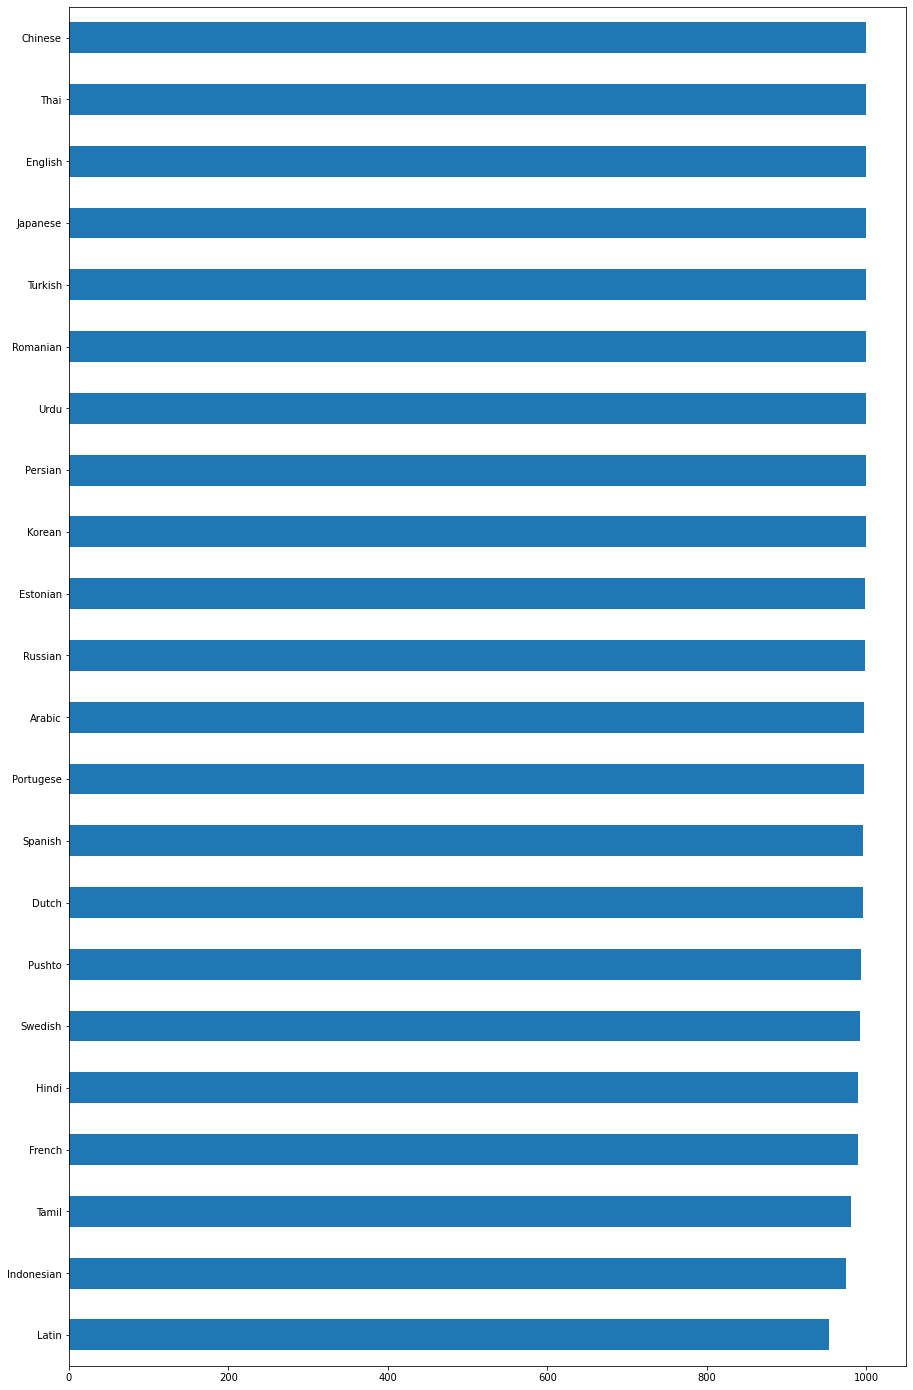

In [8]:
plt.figure(figsize=(15,25))


df['language'].value_counts().sort_values().plot(kind = 'barh')

Then, we will look at the word count and lenght of each text sample.

In [9]:
df['text_len'] = df['preprocessed_text'].astype(str).apply(len)
df['word_count'] = df['preprocessed_text'].apply(lambda x: len(str(x).split()))
df

,Text,language,preprocessed_text,text_len,word_count
0,klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn...,Estonian,klement gottwaldi surnukeha palsameeriti ning paigutati mausoleumi surnukeha oli aga liiga hilja ja oskamatult palsameeritud ning hakkas ilmutama lagunemise tundemärke aastal viidi ta surnukeha mausoleumist ära ja kremeeriti zlíni linn ...,334,43
1,sebes joseph pereira thomas på eng the jesuits and the sino-russian treaty of nerchinsk the diary of thomas pereira bibliotheca instituti historici s i -- rome libris,Swedish,sebes joseph pereira thomas på eng the jesuits and the sino russian treaty of nerchinsk the diary of thomas pereira bibliotheca instituti historici s i rome libris,163,27
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เริ่มตั้งแต่ถนนสนามไชยถึงแม่น้ำเจ้าพระยาที่ถนนตก กรุงเทพมหานคร เป็นถนนรุ่นแรกที่ใช้เทคนิคการสร้างแบบตะวันตก ปัจจุบันผ่านพื้นที่เขตพระนคร เขตป้อมปราบศัตรูพ่าย เขตสัมพันธวงศ์ เขตบางรัก เขตสาทร ...,Thai,ถนนเจร ญกร ง อ กษรโรม น thanon charoen krung เร มต งแต ถนนสนามไชยถ งแม น ำเจ าพระยาท ถนนตก กร งเทพมหานคร เป นถนนร นแรกท ใช เทคน คการสร างแบบตะว นตก ป จจ บ นผ านพ นท เขตพระนคร เขตป อมปราบศ ตร พ าย เขตส มพ นธวงศ เขตบางร ก เขตสาทร และเขตบา...,243,47
3,"விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திரிகை-விசாகப்பட்டின ஆசிரியர் சம்பத்துடன் இணைந்து விரிவுபடுத்தினார் ஆண்டுகள் தொடர்ந்து செயலராக இருந்து தமிழ்மன்றத்தை நடத்திச் சென்றார் கோவை செம்மொழி மாநாட்டில் ""தமிழ்ச்சங்கங்களும் தமிழும்"" என...",Tamil,வ ச கப பட ட னம தம ழ ச சங கத த இந த ப பத த ர க வ ச கப பட ட ன ஆச ர யர சம பத த டன இண ந த வ ர வ பட த த ன ர ஆண ட கள த டர ந த ச யலர க இர ந த தம ழ மன றத த நடத த ச ச ன ற ர க வ ச ம ம ழ ம ந ட ட ல தம ழ ச சங கங கள ம தம ழ ம என ம தல ப ப ல ப ற ம ந லங ...,275,117
4,de spons behoort tot het geslacht haliclona en behoort tot de familie chalinidae de wetenschappelijke naam van de soort werd voor het eerst geldig gepubliceerd in door kudelin,Dutch,de spons behoort tot het geslacht haliclona en behoort tot de familie chalinidae de wetenschappelijke naam van de soort werd voor het eerst geldig gepubliceerd in door kudelin,175,28
...,...,...,...,...,...
21995,hors du terrain les années et sont des années de crise pour le championnat le titre de champion de france attise les convoitises et entraîne des dérives violence sur les terrains et accusations d’amateurisme marron rythment de plus e...,French,hors du terrain les années et sont des années de crise pour le championnat le titre de champion de france attise les convoitises et entraîne des dérives violence sur les terrains et accusations d amateurisme marron rythment de plus en p...,1120,189
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเดียทรงได้พบอดียรองกงสุลอังกฤษ นายเฮนรี่ อลาบาสเตอร์ ได้กราบบังคมทูลถวายคำแนะนำในสำรวจและทำแผนที่ จึงได้ทรงพระกรุณาโปรดเกล้าฯ ให้ตั้งกองทำแผนที่ทดลอง ใน พศ,Thai,ใน พศ หล กจากท เสด จประพาสแหลมมลาย ชวา อ นเด ยทรงได พบอด ยรองกงส ลอ งกฤษ นายเฮนร อลาบาสเตอร ได กราบบ งคมท ลถวายคำแนะนำในสำรวจและทำแผนท จ งได ทรงพระกร ณาโปรดเกล าฯ ให ต งกองทำแผนท ทดลอง ใน พศ,190,31
21997,con motivo de la celebración del septuagésimoquinto ° aniversario de la fundación del departamento en guillermo ceballos espinosa presentó a la gobernación de caldas por encargo de su titular dilia estrada de gómez el himno que fue ado...,Spanish,con motivo de la celebración del septuagésimoquinto aniversario de la fundación del departamento en guillermo ceballos espinosa presentó a la gobernación de caldas por encargo de su titular dilia estrada de gómez el himno que fue adopta...,426,67
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由美國的獨立廠牌bip·record發行，以外國輸入盤的形式在日本發售，旋即被抢购一空。其後於月日發行以倉木麻衣名義發行的首張日文單曲《love day after tomorrow》，正式於日本出道。這張單曲初動銷量只得約萬張，可是其後每週銷量一直上升，並於年月正式突破百萬銷量，合计万张。成為年最耀眼的新人歌手。,Chinese,年月 當時還只有歲的她在美國出道 以mai k名義推出首張英文 baby i like 由美國的獨立廠牌bip record發行 以外國輸入盤的形式在日本發售 旋即被抢购一空 其後於月日

Visualizing how many words each text sample have. 

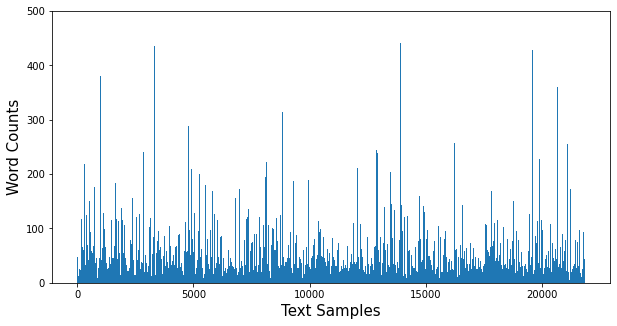

In [10]:
df['word_counts'] = df.preprocessed_text.apply(lambda x: len(x.split()))
plt.figure(figsize=(10,5))
plt.bar(np.arange(len(df.word_counts)), df.word_counts.values, width=1)
plt.ylim(0,500)
plt.xlabel("Text Samples", fontsize=15)
plt.ylabel("Word Counts", fontsize=15);

Visualizing the character lenght per sample text.

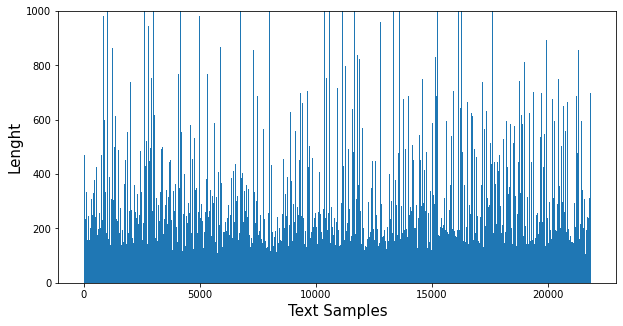

In [11]:
df['lenght'] = df.preprocessed_text.apply(lambda x: len(x))
plt.figure(figsize=(10,5))
plt.bar(np.arange(len(df.lenght)), df.lenght.values, width=1)
plt.ylim(0,1000)
plt.xlabel("Text Samples", fontsize=15)
plt.ylabel("Lenght", fontsize=15);